## **Preprocessing the Data**

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from statistics import mode

%matplotlib inline


In [ ]:
df=pd.read_csv('d_training.csv')

In [ ]:
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [ ]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [ ]:
df.head(10)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
8,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
9,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [ ]:
df.tail()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN
4919,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,Impetigo,NaN


In [ ]:
df.shape

(4920, 134)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [ ]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [ ]:
df['prognosis'].mode()

0     (vertigo) Paroymsal  Positional Vertigo
1                                        AIDS
2                                        Acne
3                         Alcoholic hepatitis
4                                     Allergy
5                                   Arthritis
6                            Bronchial Asthma
7                        Cervical spondylosis
8                                 Chicken pox
9                         Chronic cholestasis
10                                Common Cold
11                                     Dengue
12                                  Diabetes 
13               Dimorphic hemmorhoids(piles)
14                              Drug Reaction
15                           Fungal infection
16                                       GERD
17                            Gastroenteritis
18                               Heart attack
19                                Hepatitis B
20                                Hepatitis C
21                                

In [ ]:
df['prognosis'].value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [ ]:
df.groupby(df['prognosis']).count()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
prognosis,,,,,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,0
AIDS,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,0
Acne,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,0
Alcoholic hepatitis,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,0
Allergy,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,0
Arthritis,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,0
Bronchial Asthma,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,0
Cervical spondylosis,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,0
Chicken pox,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,0


## **Graphs**

# Histogram

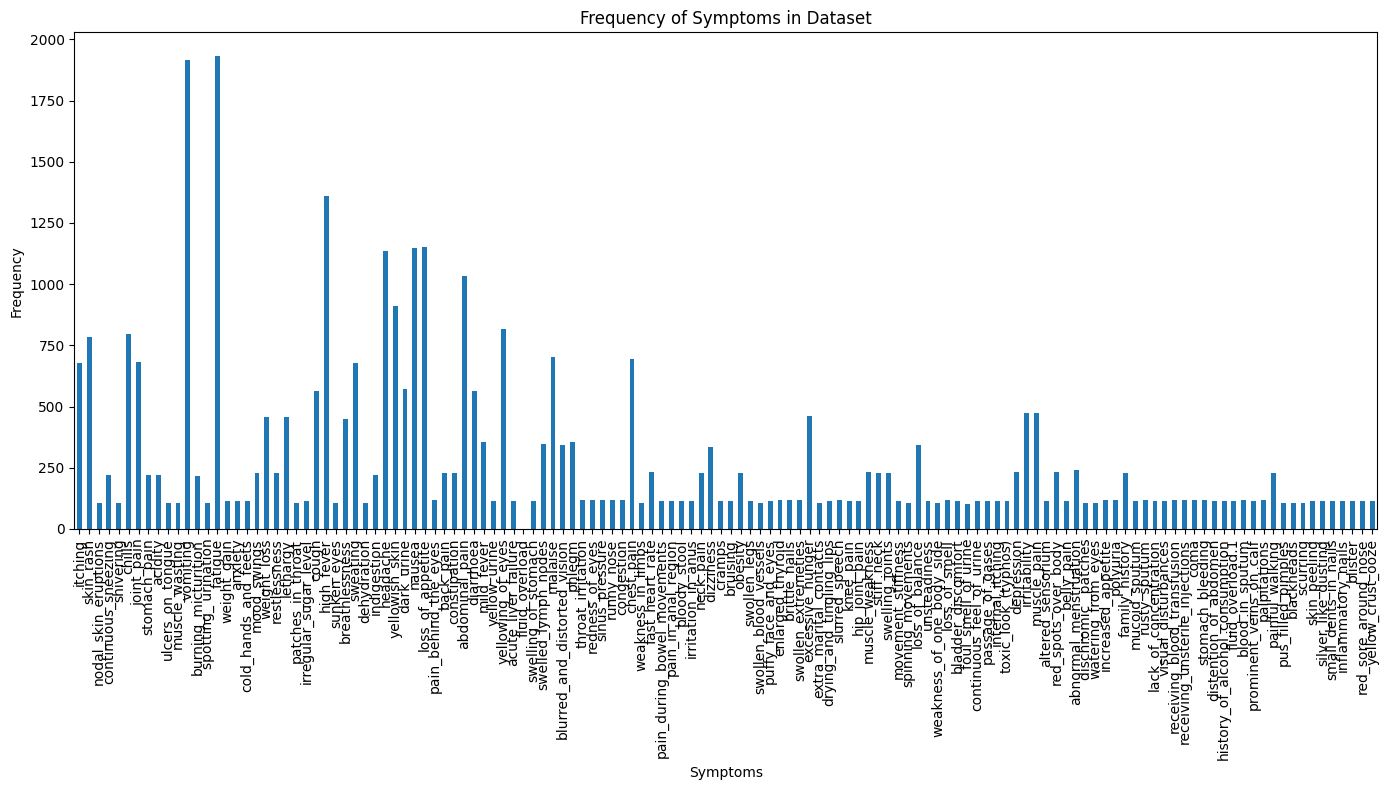

In [ ]:
# Drop the 'prognosis' and any unnamed columns for the histogram
symptoms_data = df.drop(columns=['prognosis', 'Unnamed: 133'])

# Flatten the data to get the count of each symptom across all records
symptom_counts = symptoms_data.sum(axis=0)

# Draw the histogram
plt.figure(figsize=(14, 8))
symptom_counts.plot(kind='bar')
plt.title('Frequency of Symptoms in Dataset')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Bar Plot

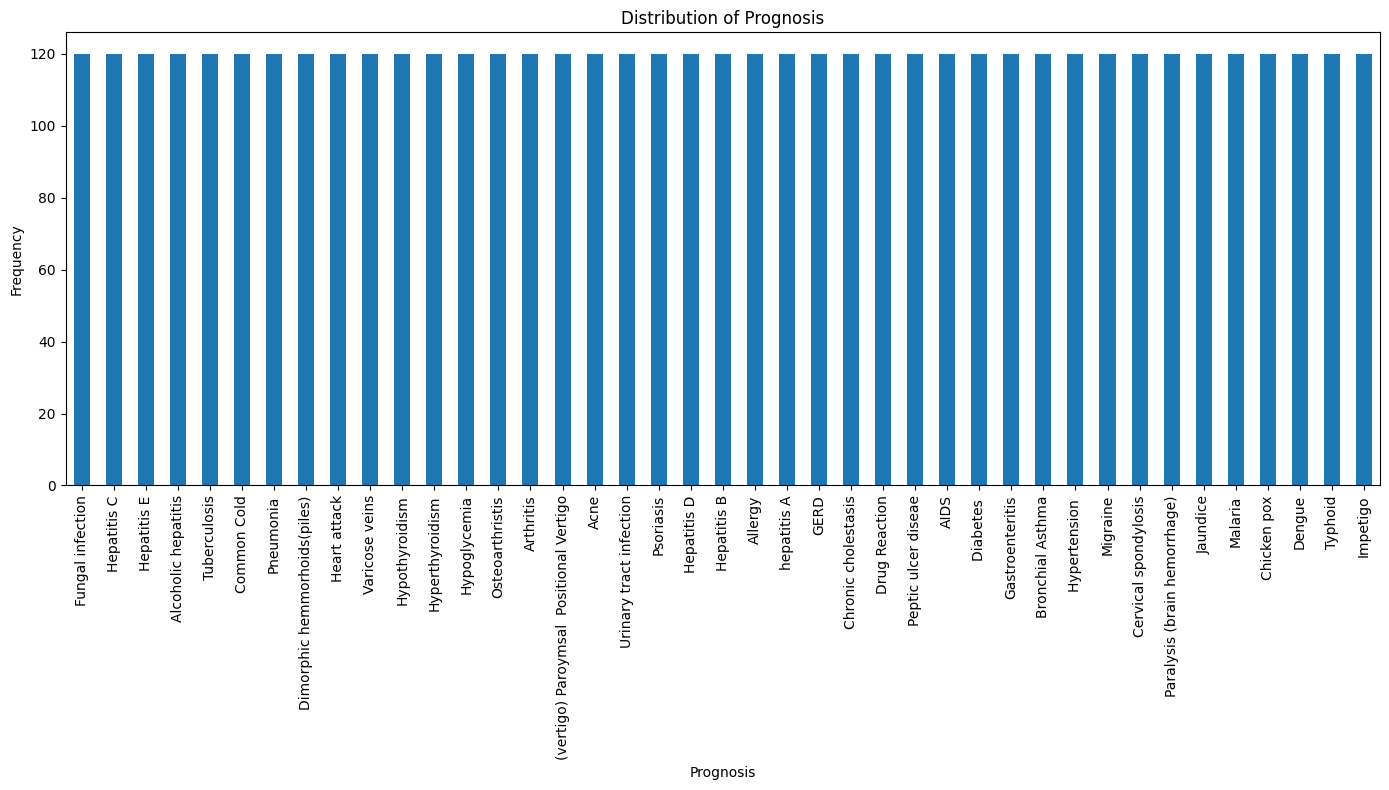

In [ ]:
# Plot the distribution of prognosis
plt.figure(figsize=(14, 8))
df['prognosis'].value_counts().plot(kind='bar')
plt.title('Distribution of Prognosis')
plt.xlabel('Prognosis')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Scatter Plot

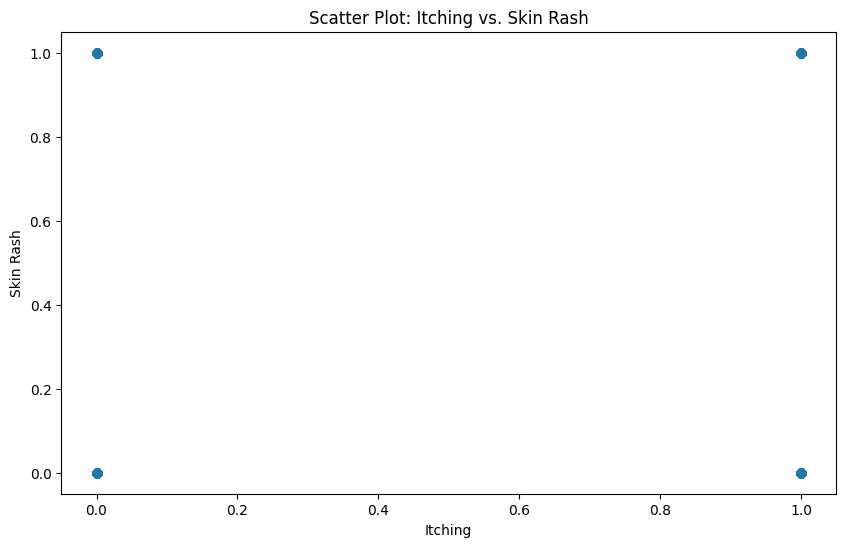

In [ ]:
# Scatter plot for itching vs. skin_rash
plt.figure(figsize=(10, 6))
plt.scatter(df['itching'], df['skin_rash'], alpha=0.5)
plt.title('Scatter Plot: Itching vs. Skin Rash')
plt.xlabel('Itching')
plt.ylabel('Skin Rash')
plt.show()

## Line Plot

<Figure size 1200x800 with 0 Axes>

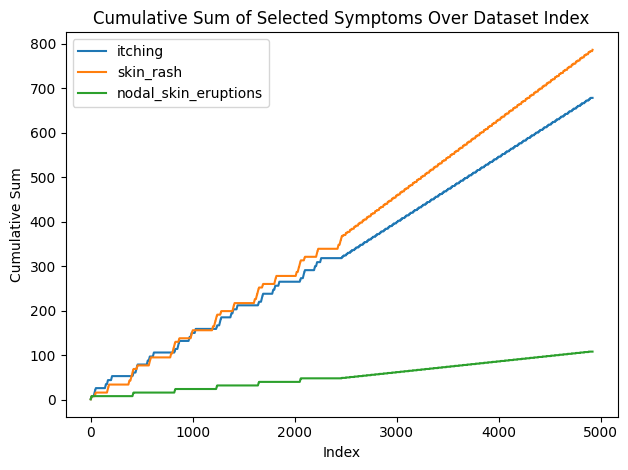

In [ ]:
# Select a few symptoms for the line plot
symptoms_subset = df[['itching', 'skin_rash', 'nodal_skin_eruptions']]

# Calculate the cumulative sum of symptoms
cumulative_symptoms = symptoms_subset.cumsum()

# Plot the line chart
plt.figure(figsize=(12, 8))
cumulative_symptoms.plot(kind='line')
plt.title('Cumulative Sum of Selected Symptoms Over Dataset Index')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Area Plot

<Figure size 1200x800 with 0 Axes>

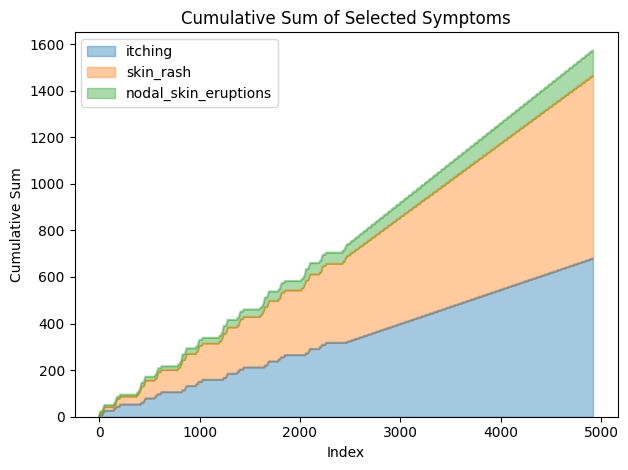

In [ ]:
symptoms_subset = df[['itching', 'skin_rash', 'nodal_skin_eruptions']]

cumulative_symptoms = symptoms_subset.cumsum()

plt.figure(figsize=(12, 8))
cumulative_symptoms.plot(kind='area', alpha=0.4)
plt.title('Cumulative Sum of Selected Symptoms')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Pie Chart

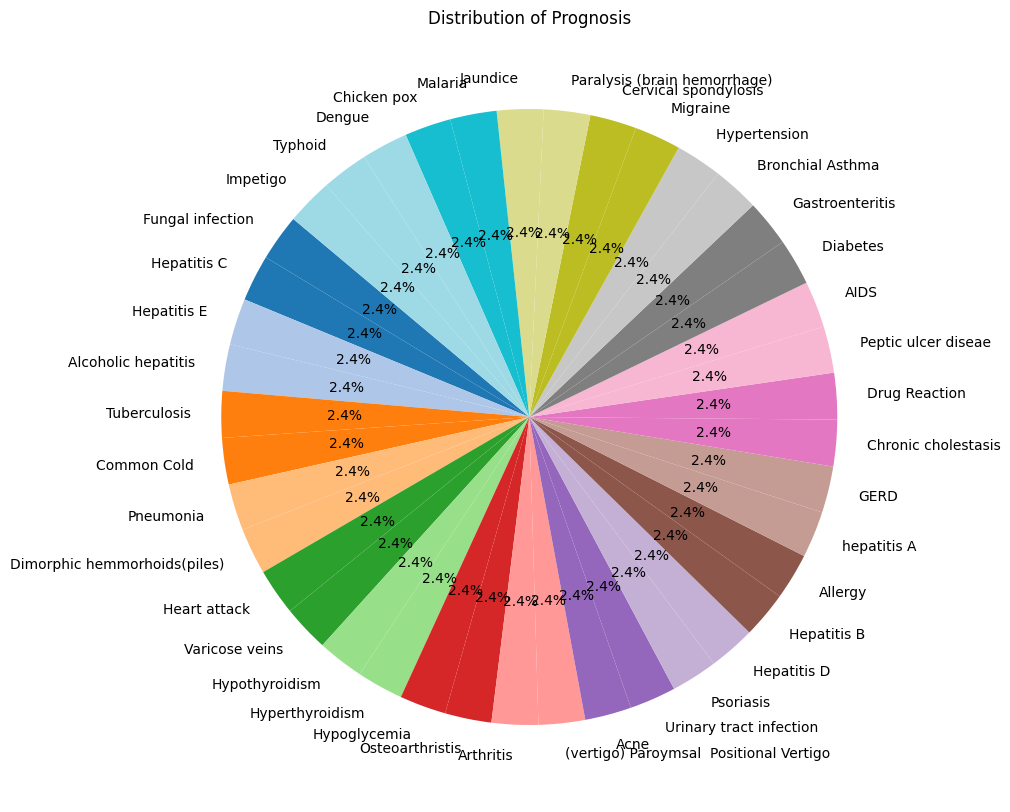

In [ ]:

prognosis_counts = df['prognosis'].value_counts()

plt.figure(figsize=(10, 10))
prognosis_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='tab20')
plt.title('Distribution of Prognosis')
plt.ylabel('')  # Remove the y-label for better visualization
plt.show()

## Heat Map

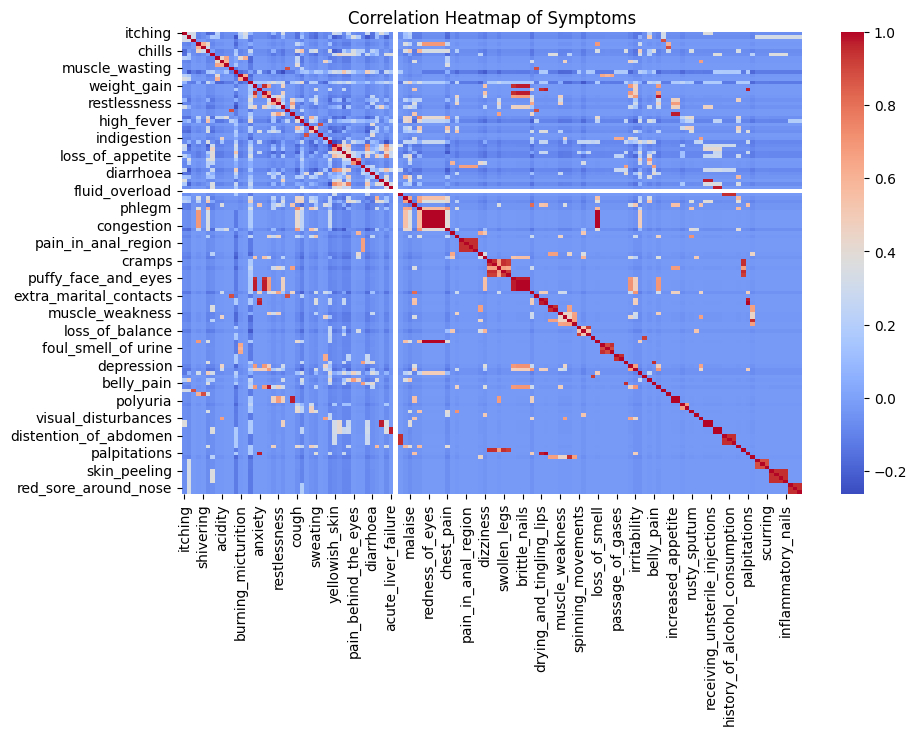

In [ ]:
correlation_matrix = symptoms_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap of Symptoms')
plt.show()

## Word Cloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
wc=pd.read_csv('d_training.csv')
wc['prognosis']

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

In [ ]:
text=wc['prognosis'].str.cat(sep=' ')
stopwords= set(STOPWORDS)
new_words = []
new_stopwords=stopwords.union(new_words)

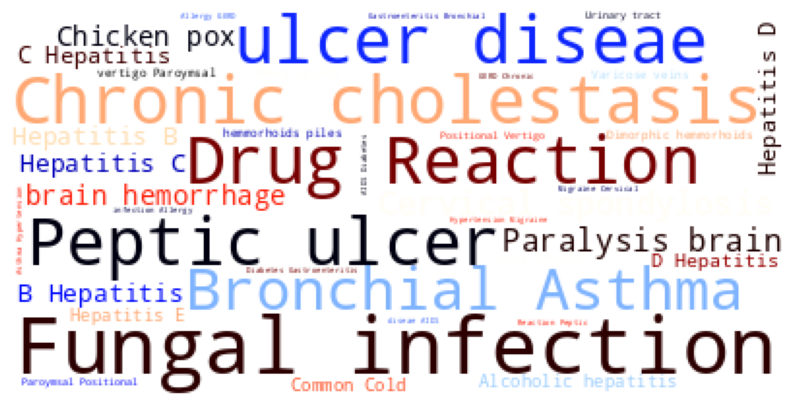

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)

##**Model Building**

In [ ]:
DATA_PATH = "/content/d_training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1)

In [ ]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


##Encoding prognosis into numerical


In [ ]:
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

##Spliting the data into test and train data

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


##K-fold validation

In [ ]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

##linear regressor

In [ ]:
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
LR.score(X_test,y_test)


0.9722247145727517

##SVM model

In [ ]:
SVC=SVC()

In [ ]:
scores = cross_val_score(SVC, X, y, cv = 10,
                             n_jobs = -1,
                             scoring = cv_scoring)
print(f"Scores: {scores}")
print(f"Mean Score: {np.mean(scores)}")

Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


##Gaussian model

In [ ]:
Gaussian_NB=GaussianNB()

In [ ]:
scores = cross_val_score(Gaussian_NB, X, y, cv = 10,
                             n_jobs = -1,
                             scoring = cv_scoring)
print(f"Scores: {scores}")
print(f"Mean Score: {np.mean(scores)}")

Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


##Random forest

In [ ]:
Random_Forest=RandomForestClassifier()

In [ ]:
scores = cross_val_score(Random_Forest, X, y, cv = 10,
                             n_jobs = -1,
                             scoring = cv_scoring)
print(f"Scores: {scores}")
print(f"Mean Score: {np.mean(scores)}")

Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


##Building a Robust classifier by combining all models

Accuracy on train data by SVM Classifier {100.0}
Accuracy on test data by SVM Classifier {100.0}


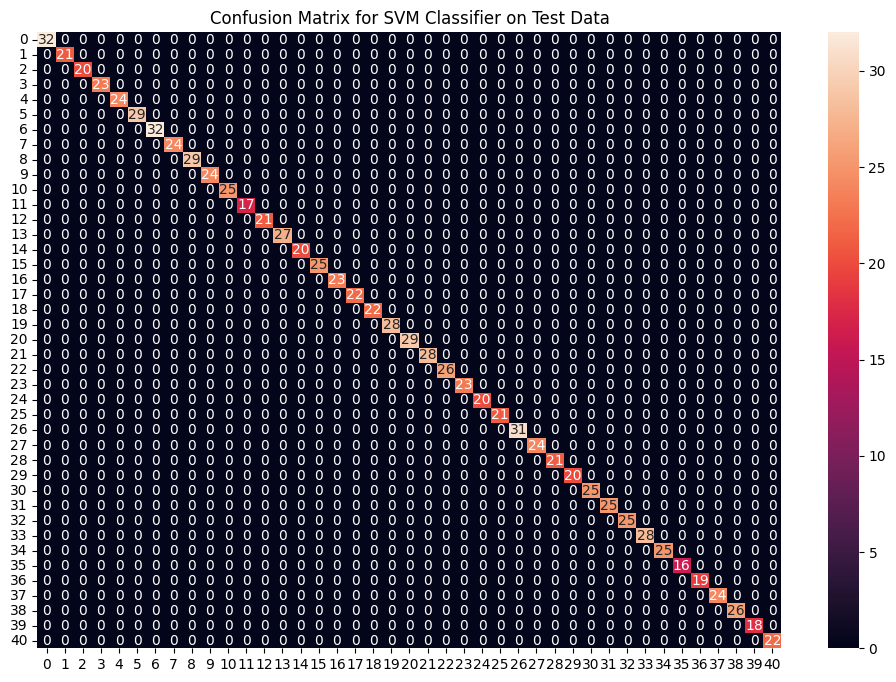

In [ ]:
from sklearn.svm import SVC # Import the SVC class

# Training and testing SVM Classifier
svm_model = SVC() # Create an instance of the SVC class
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print("Accuracy on train data by SVM Classifier",{accuracy_score(y_train, svm_model.predict(X_train))*100})

print("Accuracy on test data by SVM Classifier", {accuracy_score(y_test, preds)*100})
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

Accuracy on train data by Naive Bayes Classifier {100.0}
Accuracy on test data by Naive Bayes Classifier {100.0}


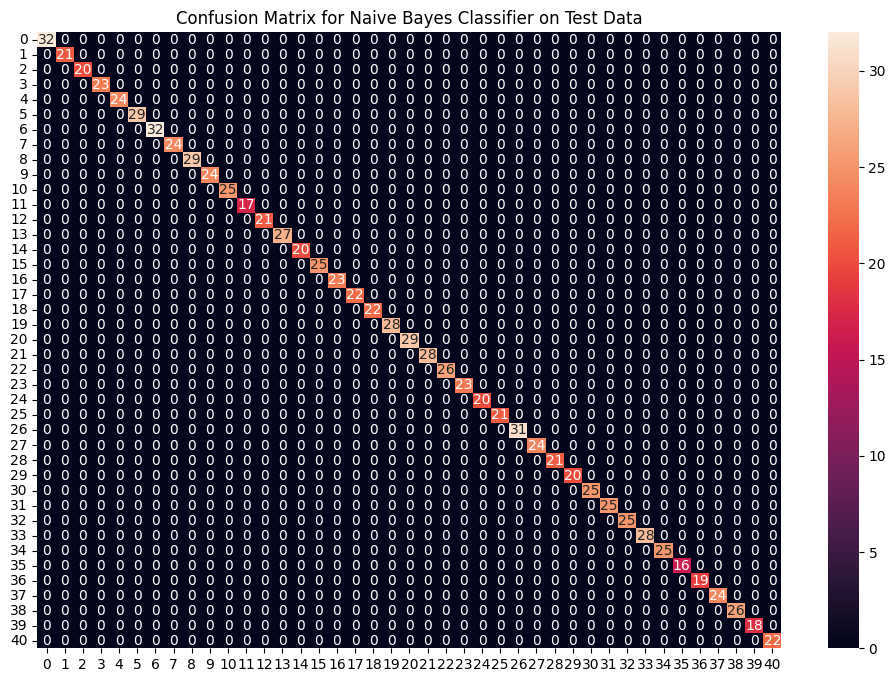

In [ ]:
# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print("Accuracy on train data by Naive Bayes Classifier"
, {accuracy_score(y_train, nb_model.predict(X_train))*100})

print("Accuracy on test data by Naive Bayes Classifier",
 {accuracy_score(y_test, preds)*100})
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()


Accuracy on train data by Random Forest Classifier {100.0}
Accuracy on test data by Random Forest Classifier {100.0}


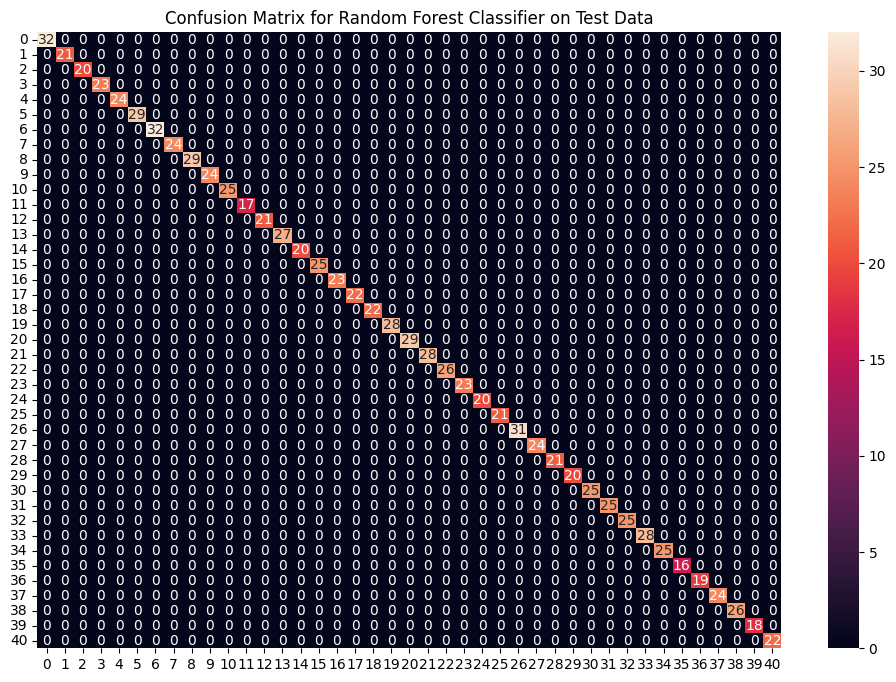

In [ ]:
# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier", {accuracy_score(y_train, rf_model.predict(X_train))*100})

print(f"Accuracy on test data by Random Forest Classifier",{accuracy_score(y_test, preds)*100})

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

Accuracy on Test dataset by the combined model {100.0}


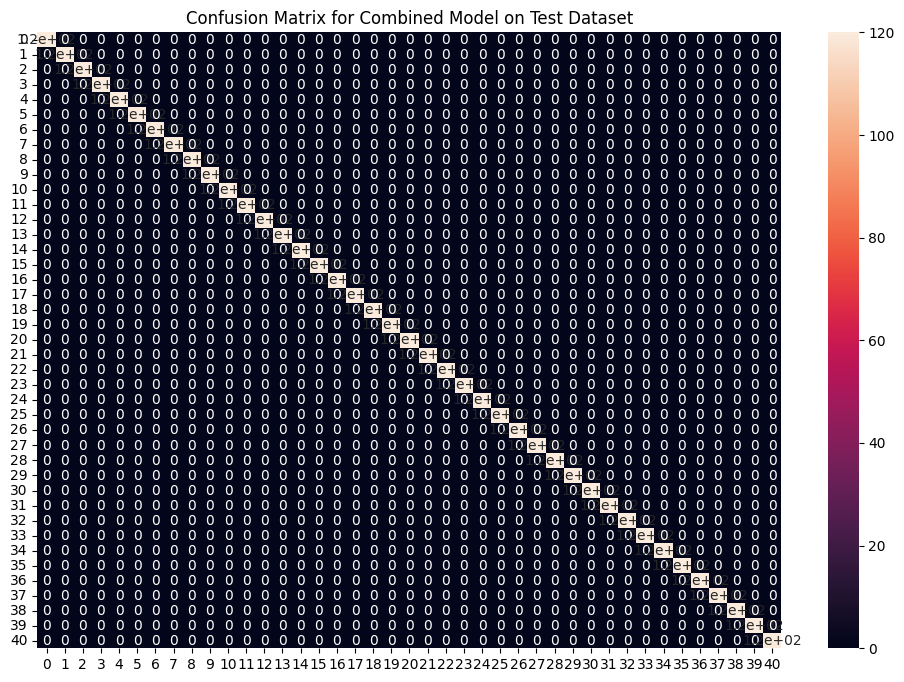

In [ ]:

final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)


test_data = pd.read_csv("/content/d_training.csv").dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)
final_preds = [mode([i, j, k]) for i, j, k in zip(svm_preds, nb_preds, rf_preds)]


print("Accuracy on Test dataset by the combined model",
 {accuracy_score(test_Y, final_preds)*100})

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


# Predicting values

In [ ]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
	symptom = " ".join([i.capitalize() for i in value.split("_")])
	symptom_index[symptom] = index

data_dict = {
	"symptom_index":symptom_index,
	"predictions_classes":encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
	symptoms = symptoms.split(",")

	# creating input data for the models
	input_data = [0] * len(data_dict["symptom_index"])
	for symptom in symptoms:
		index = data_dict["symptom_index"][symptom]
		input_data[index] = 1

	# reshaping the input data and converting it
	# into suitable format for model predictions
	input_data = np.array(input_data).reshape(1,-1)

	# generating individual outputs
	rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
	nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
	svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

	# making final prediction by taking mode of all predictions
	final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
	predictions = {
		"rf_model_prediction": rf_prediction,
		"naive_bayes_prediction": nb_prediction,
		"svm_model_prediction": svm_prediction,
		"final_prediction":final_prediction
	}
	return predictions

# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))


{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'F'}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
